# Optimizing delivery with Reinforcement Learning

![](http://img.chefdentreprise.com/Img/BREVE/2018/3/328332/recette-nestor-atteindre-rentabilite-F.jpg)

In [1]:
# Base Data Science snippet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time
from tqdm import tqdm_notebook

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Environment definition
As for any RL problem, an environment must be designed where the Agent will evolve.<br>
For convenience and readability, we will define it like OpenAI Gym environments

In [89]:
from delivery import *

Initialized Delivery Environment with 30 random stops
Target metric for optimization is time


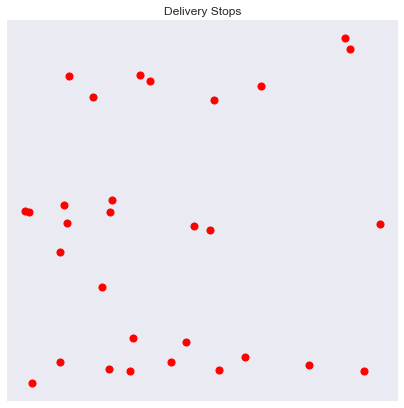

In [104]:
env = DeliveryEnvironment(n_stops = 30,method = "time")

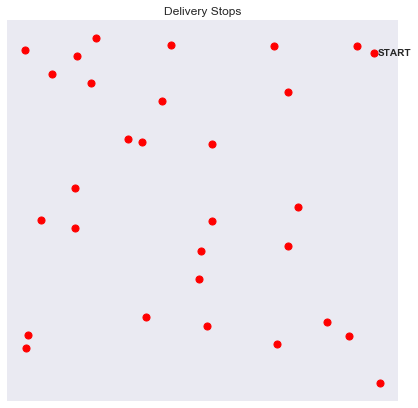

In [99]:
env.render()

In [100]:
env.stops

[17]

In [101]:
for i in [0,1,2,3,4,10,12,13]:
    env.step(i)

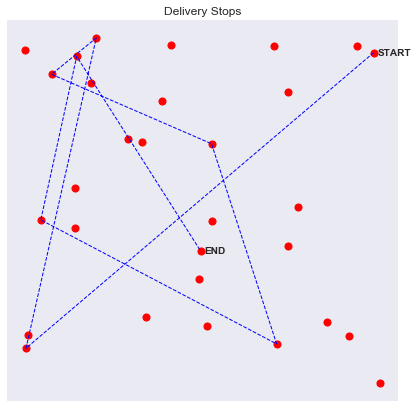

In [102]:
env.render()